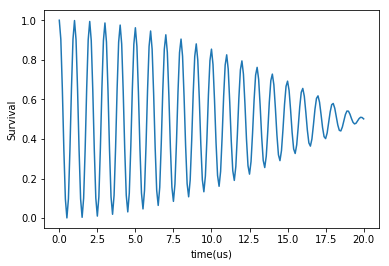

In [20]:
import scipy.linalg as lin
import numpy as np
import matplotlib.pyplot as plt

sigma_z = np.array([[1.,0.],[0.,-1.]])
sigma_x = np.array([[0,1.],[1.,0.]])
identity = np.eye(2)

H = np.zeros([4,4])
H += np.kron(sigma_x,identity)/2
H += np.kron(identity,sigma_x)/2
H += 0.05*np.kron((sigma_z+identity)/2,(sigma_z+identity)/2)

dt = 0.1
U = lin.expm(-1j*H*dt*np.pi*2)

value1 = []
value2 = []
state = np.kron([0.,1],[0.,1])
Z1 = np.kron((identity-sigma_z)/2,identity)
Z2 = np.kron(identity,(identity-sigma_z)/2)
value1 += [state.conjugate().dot(Z1.dot(state)).real]
#value2 += [state.conjugate().dot(Z2.dot(state)).real]
T_tot = 200
for i in range(T_tot):
    state = U.dot(state)
    value1 += [state.conjugate().dot(Z1.dot(state)).real]
    #value2 += [state.conjugate().dot(Z2.dot(state)).real]
plt.xlabel('time(us)')
plt.ylabel('Survival')
plt.plot(np.arange(T_tot+1)*dt,value1)
#plt.plot(value2)